# Hedging

Make sure to refer to the video for full explanations!

In [1]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
# Get data for the specified period and stocks
# Alternative using yfinance
import yfinance as yf

# Get data for the specified period and stocks
start = '2016-01-01'
end = '2017-01-01'
asset = yf.download('AAPL', start=start, end=end)['Close']
benchmark = yf.download('SPY', start=start, end=end)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
asset_ret = asset.pct_change()[1:]
bench_ret = benchmark.pct_change()[1:]

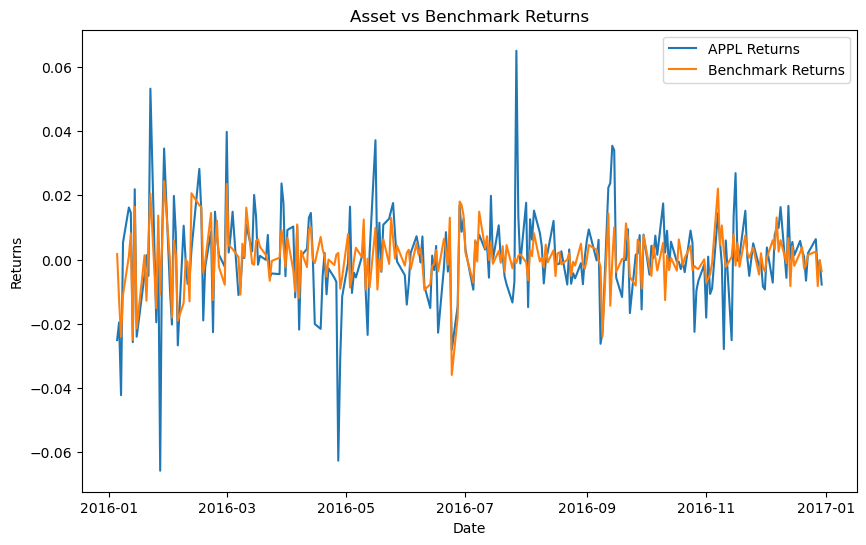

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(asset_ret, label='APPL Returns')
plt.plot(bench_ret, label='Benchmark Returns')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Asset vs Benchmark Returns')
plt.show()

## Regression for Alpha and Beta Values

Text(0, 0.5, 'AAPL Ret')

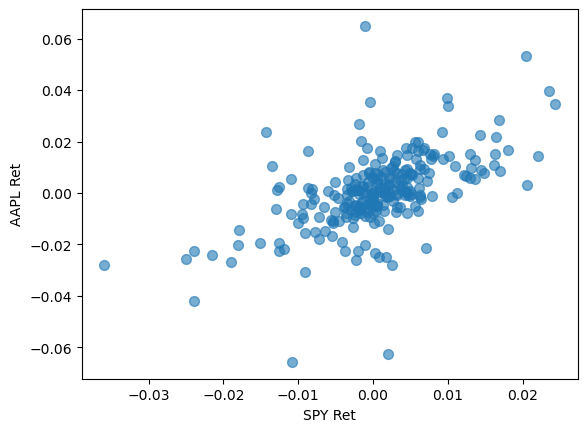

In [50]:
plt.scatter(bench_ret,asset_ret,alpha=0.6,s=50)
plt.xlabel('SPY Ret')
plt.ylabel('AAPL Ret')

In [51]:
AAPL = asset_ret.values
spy = bench_ret.values

In [52]:
# Add a constant (column of 1s for intercept)
spy_constant = sm.add_constant(spy)

# Fit regression to data
model = regression.linear_model.OLS(AAPL,spy_constant).fit()

In [53]:
model.params

array([1.96355259e-05, 1.02359920e+00])

In [54]:
alpha , beta = model.params

In [55]:
alpha

np.float64(1.9635525944403966e-05)

In [56]:
beta

np.float64(1.02359920226899)

### Plot Alpha and Beta

Text(0, 0.5, 'AAPL Ret')

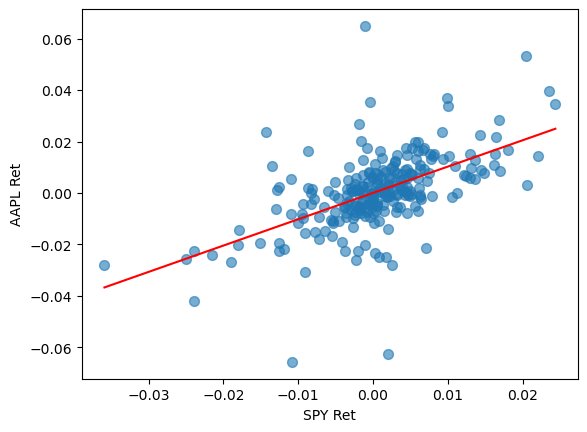

In [57]:
# Scatter Returns
plt.scatter(bench_ret,asset_ret,alpha=0.6,s=50)

# Fit Line
min_spy = bench_ret.values.min()
max_spy = bench_ret.values.max()

spy_line = np.linspace(min_spy,max_spy,100)
y = spy_line * beta + alpha

plt.plot(spy_line,y,'r')

plt.xlabel('SPY Ret')
plt.ylabel('AAPL Ret')

## Implementing the Hedge

In [58]:
hedged = -1*beta*bench_ret + asset_ret

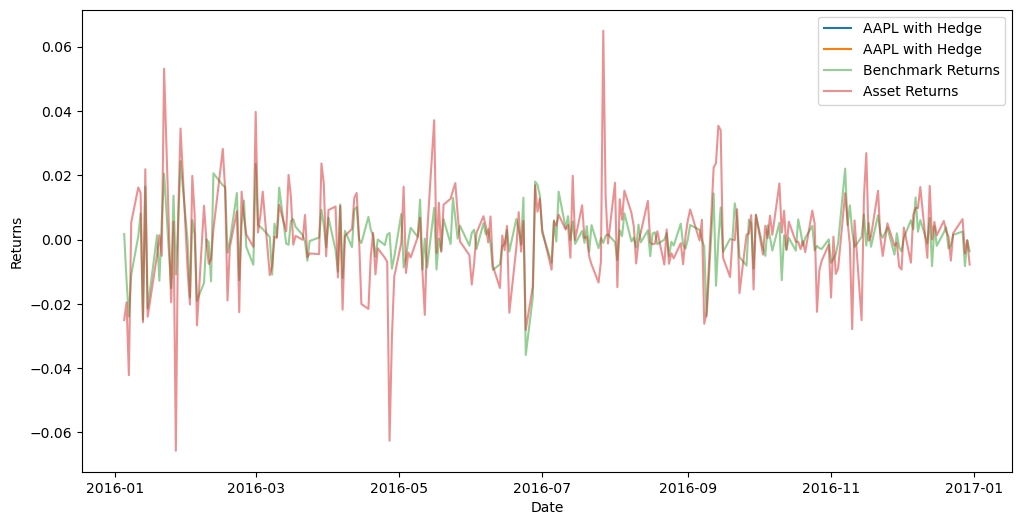

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(hedged, label='AAPL with Hedge')
plt.plot(bench_ret, alpha=0.5, label='Benchmark Returns')
plt.plot(asset_ret, alpha=0.5, label='Asset Returns')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

#### What happens if there is a big market drop?

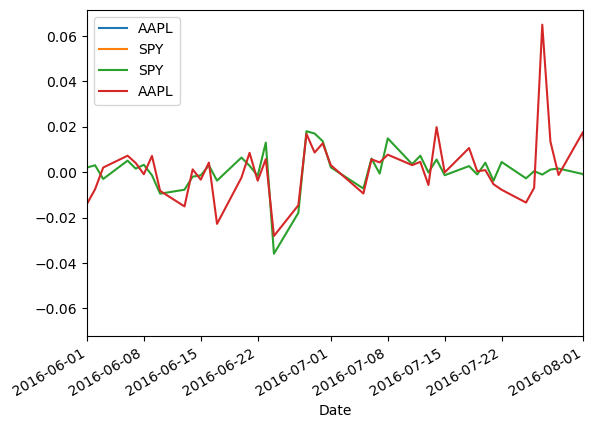

In [61]:
ax = hedged.plot(label='AAPL with Hedge')
bench_ret.plot(ax=ax, label='Benchmark Returns')
asset_ret.plot(ax=ax, label='Asset Returns')
plt.xlim(['2016-06-01','2016-08-01'])
plt.legend()
plt.show()

### Effects of Hedging

In [62]:
def alpha_beta(benchmark_ret,stock):
    
    benchmark = sm.add_constant(benchmark_ret)
    
    model = regression.linear_model.OLS(stock,benchmark).fit()
    
    return model.params[0], model.params[1]

** 2016-2017 Alpha and Beta **

In [63]:
# Get the alpha and beta estimates over the last year
from scipy import stats
import yfinance as yf  # Make sure yfinance is imported

# Define alpha_beta function if not already defined
def alpha_beta(x, y):
    # Linear regression to calculate alpha and beta
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return intercept, slope  # alpha is intercept, beta is slope

# Get the alpha and beta estimates over the last year
start = '2016-01-01'
end = '2017-01-01'

# Get data using yfinance
# Check the actual column names in the dataframe
asset2016 = yf.download('AAPL', start=start, end=end)
benchmark2016 = yf.download('SPY', start=start, end=end)

# Print column names to verify
print("AAPL columns:", asset2016.columns)
print("SPY columns:", benchmark2016.columns)

# Use 'Adj Close' if it exists, otherwise try 'Close'
if 'Adj Close' in asset2016.columns:
    asset_prices = asset2016['Adj Close']
    benchmark_prices = benchmark2016['Adj Close']
else:
    # Fall back to 'Close' if 'Adj Close' is not available
    asset_prices = asset2016['Close']
    benchmark_prices = benchmark2016['Close']

asset_ret2016 = asset_prices.pct_change()[1:]
benchmark_ret2016 = benchmark_prices.pct_change()[1:]

aret_val = asset_ret2016.values
bret_val = benchmark_ret2016.values

alpha2016, beta2016 = alpha_beta(bret_val, aret_val)

print('2016 Based Figures')
print('alpha: ' + str(alpha2016))
print('beta: ' + str(beta2016))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AAPL columns: MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])
SPY columns: MultiIndex([( 'Close', 'SPY'),
            (  'High', 'SPY'),
            (   'Low', 'SPY'),
            (  'Open', 'SPY'),
            ('Volume', 'SPY')],
           names=['Price', 'Ticker'])
2016 Based Figures
alpha: [1.96355259e-05]
beta: [1.0235992]


** Creating a Portfolio **

In [64]:
# Create hedged portfolio and compute alpha and beta
portfolio = -1*beta2016*benchmark_ret2016 + asset_ret2016

alpha, beta = alpha_beta(benchmark_ret2016,portfolio)
print('Portfolio with Alphas and Betas:')
print('alpha: ' + str(alpha))
print('beta: ' + str(beta))

Portfolio with Alphas and Betas:
alpha: [nan nan]
beta: [nan nan]


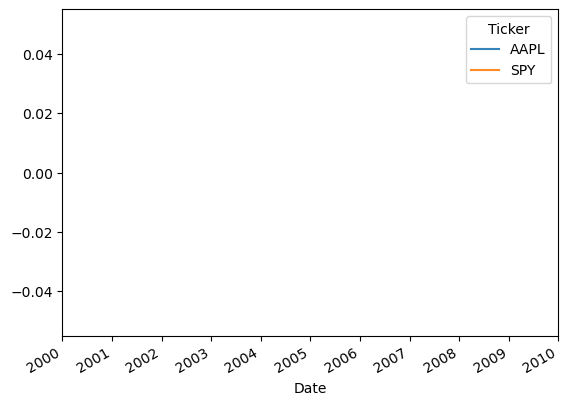

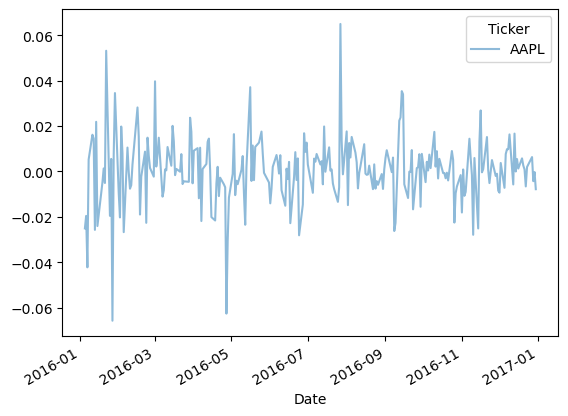

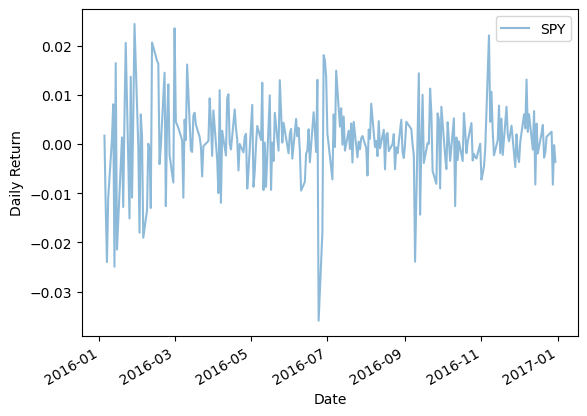

In [65]:
# Plot the returns of the portfolio as well as the asset by itself
portfolio.plot(alpha=0.9,label='AAPL with Hedge')
asset_ret2016.plot(alpha=0.5);
benchmark_ret2016.plot(alpha=0.5)
plt.ylabel("Daily Return")
plt.legend();

In [66]:
portfolio.mean()

Ticker
AAPL   NaN
SPY    NaN
dtype: float64

In [67]:
asset_ret2016.mean()

Ticker
AAPL    0.000574
dtype: float64

In [68]:
portfolio.std()

Ticker
AAPL   NaN
SPY    NaN
dtype: float64

In [69]:
asset_ret2016.std()

Ticker
AAPL    0.014731
dtype: float64

_____

** 2017 Based Figures **

In [71]:
# Get data for a different time frame:
# Import yfinance library for stock data
import yfinance as yf
import numpy as np

# Define the alpha_beta function if it's not already defined
def alpha_beta(benchmark_returns, asset_returns):
    # Calculate covariance and variance
    covariance = np.cov(asset_returns, benchmark_returns)[0, 1]
    benchmark_variance = np.var(benchmark_returns)
    
    # Calculate beta and alpha
    beta = covariance / benchmark_variance
    alpha = np.mean(asset_returns) - beta * np.mean(benchmark_returns)
    
    return alpha, beta

# Get data for a different time frame:
start = '2017-01-01'
end = '2017-08-01'

# Use yfinance to download the data
asset2017 = yf.download('AAPL', start=start, end=end)['Close']
benchmark2017 = yf.download('SPY', start=start, end=end)['Close']

# Calculate returns
asset_ret2017 = asset2017.pct_change()[1:]
benchmark_ret2017 = benchmark2017.pct_change()[1:]

aret_val = asset_ret2017.values
bret_val = benchmark_ret2017.values

# Calculate alpha and beta
alpha2017, beta2017 = alpha_beta(bret_val, aret_val)

print('2016 Based Figures')
print('alpha: ' + str(alpha2017))
print('beta: ' + str(beta2017))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

2016 Based Figures
alpha: nan
beta: nan



C:\Users\gugaa\AppData\Local\Temp\ipykernel_5016\788520118.py:9: RuntimeWarning: Degrees of freedom <= 0 for slice
  covariance = np.cov(asset_returns, benchmark_returns)[0, 1]
C:\Users\gugaa\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\gugaa\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


** Creating a Portfolio based off 2016 Beta estimate **

In [82]:
# First, check the shapes of your variables
print("asset_ret2017 shape:", asset_ret2017.shape)
print("beta2016 shape:", beta2016.shape)
print("benchmark_ret2017 shape:", benchmark_ret2017.shape)

# Make sure beta2016 is a scalar or has compatible shape for multiplication
# If beta2016 is a vector but should be a scalar, you might need to use a specific value
# For example, if beta2016 is an array but you need just one value:
if hasattr(beta2016, 'shape') and len(beta2016.shape) > 0:
    beta_value = beta2016[0]  # Use the first value or another appropriate selection
else:
    beta_value = beta2016

# Recalculate portfolio with proper dimensions
portfolio = asset_ret2017 - beta_value * benchmark_ret2017

# Make sure both inputs to alpha_beta have the same shape
# If benchmark_ret2017 and portfolio need to be the same length:
min_length = min(len(benchmark_ret2017), len(portfolio))
benchmark_ret_trimmed = benchmark_ret2017[:min_length]
portfolio_trimmed = portfolio[:min_length]

# Now call alpha_beta with properly shaped inputs
alpha, beta = alpha_beta(benchmark_ret_trimmed, portfolio_trimmed)

print('Portfolio with Alphas and Betas Out of Sample:')
print('alpha: ' + str(alpha))
print('beta: ' + str(beta))

asset_ret2017 shape: (144, 1)
beta2016 shape: (1,)
benchmark_ret2017 shape: (144, 1)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 1

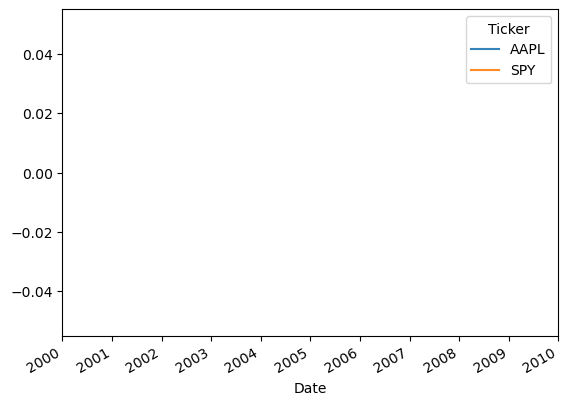

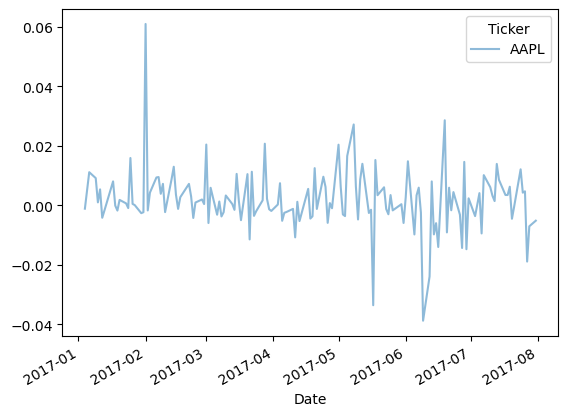

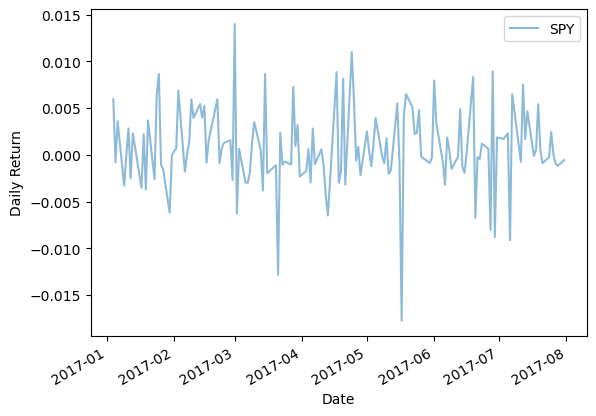

In [73]:
# Plot the returns of the portfolio as well as the asset by itself
portfolio.plot(alpha=0.9,label='AAPL with Hedge')
asset_ret2017.plot(alpha=0.5);
benchmark_ret2017.plot(alpha=0.5)
plt.ylabel("Daily Return")
plt.legend();

What are the actual effects? Typically sacrificing average returns for less volatility, but this is also highly dependent on the security:

In [76]:
portfolio.mean()

Ticker
AAPL   NaN
SPY    NaN
dtype: float64

In [190]:
asset_ret2017.mean()

0.0018808609159293456

In [191]:
portfolio.std()

0.009066375411652783

In [192]:
asset_ret2017.std()

0.010484461271996029

# Great Job!